In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import random
RS = 27
random.seed(RS)
np.random.seed(RS)

In [3]:
# Read training data. 
# Inspections of restaurants
scores_known = pd.read_csv('../code/data/facility_scores_known.csv')
scores_known.head()

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,...,inspection_type,violation_id,violation_description,risk_category,Neighborhoods (old),Police Districts,Supervisor Districts,Fire Prevention Districts,Zip Codes,Analysis Neighborhoods
0,69618,Fancy Wheatfield Bakery,1362 Stockton St,San Francisco,CA,94133,NaN,NaN,NaN,NaN,...,Complaint,69618_20190304_103130,Inadequate sewage or wastewater disposal,Moderate Risk,NaN,NaN,NaN,NaN,NaN,NaN
1,97975,BREADBELLY,1408 Clement St,San Francisco,CA,94118,NaN,NaN,NaN,1.415724e+10,...,Routine - Unscheduled,97975_20190725_103124,Inadequately cleaned or sanitized food contact...,Moderate Risk,NaN,NaN,NaN,NaN,NaN,NaN
2,69487,Hakkasan San Francisco,1 Kearny St,San Francisco,CA,94108,NaN,NaN,NaN,NaN,...,Routine - Unscheduled,69487_20180418_103119,Inadequate and inaccessible handwashing facili...,Moderate Risk,NaN,NaN,NaN,NaN,NaN,NaN
3,91044,Chopsticks Restaurant,4615 Mission St,San Francisco,CA,94112,NaN,NaN,NaN,NaN,...,Non-inspection site visit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,85987,Tselogs,552 Jones St,San Francisco,CA,94102,NaN,NaN,NaN,NaN,...,Routine - Unscheduled,85987_20180412_103132,Improper thawing methods,Moderate Risk,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Drop the rows that have no inspection score. 
score_cleaned = scores_known.dropna(subset=['inspection_score'])

# Narrow down the columns. 
# A. score_data = score_cleaned[['violation_description', 'risk_category', 'inspection_score']]
# B. score_data = score_cleaned[['violation_description', 'risk_category', 'inspection_score', 'business_latitude', 'business_longitude']]
# C. score_data = score_cleaned[['inspection_type', 'violation_description', 'risk_category', 'inspection_score', 'business_postal_code', 'business_latitude', 'business_longitude']]
# D. score_data = score_cleaned[['violation_description', 'risk_category', 'inspection_score', 'business_postal_code', 'business_latitude', 'business_longitude']]
# E. score_data = score_cleaned[['violation_description', 'risk_category', 
#                                'business_postal_code', 'business_latitude', 'business_longitude', 
#                                'inspection_score', 
#                                'Neighborhoods (old)', 'Police Districts', 'Supervisor Districts', 
#                                'Fire Prevention Districts', 'Zip Codes', 'Analysis Neighborhoods']]
# F. score_data = score_cleaned[['business_address', 'violation_description', 'risk_category', 
#                                'business_postal_code', 'business_latitude', 'business_longitude', 
#                                'inspection_score', 
#                                'Neighborhoods (old)', 'Police Districts', 'Supervisor Districts', 
#                                'Fire Prevention Districts', 'Zip Codes', 'Analysis Neighborhoods']]
# G. score_data = score_cleaned[['business_address', 'violation_description', 'risk_category', 
#                     'business_postal_code', 'business_latitude', 'business_longitude', 'inspection_score']]

# H.
score_data = score_cleaned[['business_name', 'business_address', 'violation_description', 'risk_category', 
                               'business_postal_code', 'business_latitude', 'business_longitude', 
                               'inspection_score', 
                               'Neighborhoods (old)', 'Police Districts', 'Supervisor Districts', 
                               'Fire Prevention Districts', 'Zip Codes', 'Analysis Neighborhoods']]
# # I.
# score_data = score_cleaned[['business_name', 'business_address', 'violation_description', 'risk_category', 
#                                'business_postal_code', 'business_latitude', 'business_longitude', 
#                                'inspection_score']]

score_data.head()

,business_name,business_address,violation_description,risk_category,business_postal_code,business_latitude,business_longitude,inspection_score,Neighborhoods (old),Police Districts,Supervisor Districts,Fire Prevention Districts,Zip Codes,Analysis Neighborhoods
1,BREADBELLY,1408 Clement St,Inadequately cleaned or sanitized food contact...,Moderate Risk,94118,NaN,NaN,96.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Hakkasan San Francisco,1 Kearny St,Inadequate and inaccessible handwashing facili...,Moderate Risk,94108,NaN,NaN,88.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Tselogs,552 Jones St,Improper thawing methods,Moderate Risk,94102,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,NaN
7,"The Estate Kitchen, LLC",799 Bryant St,Improper food storage,Low Risk,94107,NaN,NaN,86.0,NaN,NaN,NaN,NaN,NaN,NaN
8,Beloved Cafe,3338 24th St,Low risk vermin infestation,Low Risk,94110,NaN,NaN,96.0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Define the ordinal scale of 'risk_category' column. 
score_data['risk_category'] = score_data['risk_category'].fillna('Good')
risk_mapping = {'High Risk': 0, 'Moderate Risk': 1, 'Low Risk': 2, 'Good': 3}
score_data['risk_category'] = score_data['risk_category'].map(risk_mapping)
score_data.head()

/Users/kei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/kei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,business_name,business_address,violation_description,risk_category,business_postal_code,business_latitude,business_longitude,inspection_score,Neighborhoods (old),Police Districts,Supervisor Districts,Fire Prevention Districts,Zip Codes,Analysis Neighborhoods
1,BREADBELLY,1408 Clement St,Inadequately cleaned or sanitized food contact...,1,94118,NaN,NaN,96.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Hakkasan San Francisco,1 Kearny St,Inadequate and inaccessible handwashing facili...,1,94108,NaN,NaN,88.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Tselogs,552 Jones St,Improper thawing methods,1,94102,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,NaN
7,"The Estate Kitchen, LLC",799 Bryant St,Improper food storage,2,94107,NaN,NaN,86.0,NaN,NaN,NaN,NaN,NaN,NaN
8,Beloved Cafe,3338 24th St,Low risk vermin infestation,2,94110,NaN,NaN,96.0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
score_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31650 entries, 1 to 43198
Data columns (total 14 columns):
business_name                31650 non-null object
business_address             31650 non-null object
violation_description        30010 non-null object
risk_category                31650 non-null int64
business_postal_code         30983 non-null object
business_latitude            17259 non-null float64
business_longitude           17259 non-null float64
inspection_score             31650 non-null float64
Neighborhoods (old)          17250 non-null float64
Police Districts             17250 non-null float64
Supervisor Districts         17250 non-null float64
Fire Prevention Districts    17220 non-null float64
Zip Codes                    17256 non-null float64
Analysis Neighborhoods       17250 non-null float64
dtypes: float64(9), int64(1), object(4)
memory usage: 3.6+ MB


In [7]:
# One hot encoding for 'violation_description' column
df_dummy = pd.get_dummies(score_data['violation_description']) 
score_data = pd.concat([score_data.drop(['violation_description'], axis=1), df_dummy], axis=1)
score_data.head()

,business_name,business_address,risk_category,business_postal_code,business_latitude,business_longitude,inspection_score,Neighborhoods (old),Police Districts,Supervisor Districts,...,Unauthorized or unsafe use of time as a public health control measure,Unclean hands or improper use of gloves,Unclean nonfood contact surfaces,Unclean or degraded floors walls or ceilings,Unclean or unsanitary food contact surfaces,Unclean unmaintained or improperly constructed toilet facilities,Unpermitted food facility,Unsanitary employee garments hair or nails,Wiping cloths not clean or properly stored or inadequate sanitizer,Worker safety hazards
1,BREADBELLY,1408 Clement St,1,94118,NaN,NaN,96.0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,Hakkasan San Francisco,1 Kearny St,1,94108,NaN,NaN,88.0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,Tselogs,552 Jones St,1,94102,NaN,NaN,94.0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
7,"The Estate Kitchen, LLC",799 Bryant St,2,94107,NaN,NaN,86.0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
8,Beloved Cafe,3338 24th St,2,94110,NaN,NaN,96.0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [8]:
score_data.describe()

,risk_category,business_latitude,business_longitude,inspection_score,Neighborhoods (old),Police Districts,Supervisor Districts,Fire Prevention Districts,Zip Codes,Analysis Neighborhoods,...,Unauthorized or unsafe use of time as a public health control measure,Unclean hands or improper use of gloves,Unclean nonfood contact surfaces,Unclean or degraded floors walls or ceilings,Unclean or unsanitary food contact surfaces,Unclean unmaintained or improperly constructed toilet facilities,Unpermitted food facility,Unsanitary employee garments hair or nails,Wiping cloths not clean or properly stored or inadequate sanitizer,Worker safety hazards
count,31650.000000,17259.000000,17259.000000,31650.000000,17250.000000,17250.000000,17250.000000,17220.000000,17256.000000,17250.000000,...,31650.000000,31650.000000,31650.000000,31650.000000,31650.000000,31650.000000,31650.000000,31650.000000,31650.000000,31650.000000
mean,1.421232,37.764940,-122.405758,86.220632,18.889217,4.783014,7.051536,7.403659,19840.741945,19.411710,...,0.000885,0.015071,0.033902,0.082022,0.029100,0.005182,0.001675,0.001074,0.047962,0.000758
std,0.785065,0.498517,1.614247,8.487814,11.785273,2.949758,3.142334,4.482572,13392.350476,11.595448,...,0.029731,0.121838,0.180980,0.274403,0.168088,0.071798,0.040888,0.032759,0.213689,0.027527
min,0.000000,0.000000,-122.510896,45.000000,1.000000,1.000000,1.000000,1.000000,54.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,37.754882,-122.437385,81.000000,6.000000,2.000000,5.000000,3.000000,308.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,37.780193,-122.418985,87.000000,19.000000,4.000000,8.000000,8.000000,28855.000000,20.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,37.788981,-122.407274,92.000000,27.000000,7.000000,10.000000,11.000000,28859.000000,30.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.000000,37.824494,0.000000,100.000000,41.000000,10.000000,11.000000,15.000000,29492.000000,41.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
score_data['business_latitude'].median()

37.780193

In [10]:
# Fill missing latitude and longitude with median.  
score_data['business_latitude'] = score_data['business_latitude'].fillna(score_data['business_latitude'].median())
score_data['business_latitude'].isnull().sum()

0

In [11]:
score_data['business_longitude'] = score_data['business_longitude'].fillna(score_data['business_longitude'].median())
score_data['business_longitude'].isnull().sum()

0

In [12]:
# One hot encoding for 'business_postal_code' column
df_dummy = pd.get_dummies(score_data['business_postal_code'], prefix=["bpc"]) 
score_data = pd.concat([score_data.drop(['business_postal_code'], axis=1), df_dummy], axis=1)

In [13]:
# # One hot encoding for 'inspection_type' column
# df_dummy = pd.get_dummies(score_data['inspection_type']) 
# score_data = pd.concat([score_data.drop(['inspection_type'], axis=1), df_dummy], axis=1)

In [14]:
# One hot encoding for 'Neighborhoods (old)' column
df_dummy = pd.get_dummies(score_data['Neighborhoods (old)'], prefix=["n"]) 
score_data = pd.concat([score_data.drop(['Neighborhoods (old)'], axis=1), df_dummy], axis=1)

In [15]:
# One hot encoding for 'Police Districts' column
df_dummy = pd.get_dummies(score_data['Police Districts'], prefix=["pd"]) 
score_data = pd.concat([score_data.drop(['Police Districts'], axis=1), df_dummy], axis=1)

In [16]:
# One hot encoding for 'Supervisor Districts' column
df_dummy = pd.get_dummies(score_data['Supervisor Districts'], prefix=["sd"]) 
score_data = pd.concat([score_data.drop(['Supervisor Districts'], axis=1), df_dummy], axis=1)

In [17]:
# One hot encoding for 'Fire Prevention Districts' column
df_dummy = pd.get_dummies(score_data['Fire Prevention Districts'], prefix=["fpd"]) 
score_data = pd.concat([score_data.drop(['Fire Prevention Districts'], axis=1), df_dummy], axis=1)

In [18]:
# One hot encoding for 'Zip Codes' column
df_dummy = pd.get_dummies(score_data['Zip Codes'], prefix=["zc"]) 
score_data = pd.concat([score_data.drop(['Zip Codes'], axis=1), df_dummy], axis=1)

In [19]:
# One hot encoding for 'Analysis Neighborhoods' column
df_dummy = pd.get_dummies(score_data['Analysis Neighborhoods'], prefix=["an"]) 
score_data = pd.concat([score_data.drop(['Analysis Neighborhoods'], axis=1), df_dummy], axis=1)

In [20]:
# Extract street name from 'business_address' column. 
def convert(x):
    words = x.split()
    if len(words) >= 3:
        return words[1].lower()
    else:
        return 'other'
    
score_data['street_name'] = score_data['business_address'].map(convert)
score_data = score_data.drop(['business_address'], axis=1)
score_data.head()

,business_name,risk_category,business_latitude,business_longitude,inspection_score,Consumer advisory not provided for raw or undercooked foods,Contaminated or adulterated food,Discharge from employee nose mouth or eye,Employee eating or smoking,Food in poor condition,...,['an']_33.0,['an']_34.0,['an']_35.0,['an']_36.0,['an']_37.0,['an']_38.0,['an']_39.0,['an']_40.0,['an']_41.0,street_name
1,BREADBELLY,1,37.780193,-122.418985,96.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,clement
2,Hakkasan San Francisco,1,37.780193,-122.418985,88.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,kearny
4,Tselogs,1,37.780193,-122.418985,94.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,jones
7,"The Estate Kitchen, LLC",2,37.780193,-122.418985,86.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,bryant
8,Beloved Cafe,2,37.780193,-122.418985,96.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,24th


In [21]:
counts = score_data['street_name'].value_counts()
print(len(counts))
counts

444


mission    2312
geary      1373
market     1158
clement     984
24th        698
           ... 
maiden        1
thomas        1
chalet        1
island        1
clipper       1
Name: street_name, Length: 444, dtype: int64

In [22]:
counts.tail(50)

sadowa          3
event           3
03              3
tennesse        3
east            2
galvez          2
key             2
ave             2
pioche          2
london          2
hudson          2
33rd            2
industrial      2
26              2
lyon            2
lawton          2
farmers         2
duboce          2
barneveld       2
somerset        2
hoirne          2
horn            2
market/360      2
40th            2
buchannan       2
herman          2
frederick       2
48th            2
ctr-            2
embarcadrero    2
alameda         2
hagiwara        1
museum          1
hotaling        1
misson          1
31              1
underwood       1
pier            1
linden          1
-               1
fair            1
fairfax         1
langton         1
seawall         1
keith           1
maiden          1
thomas          1
chalet          1
island          1
clipper         1
Name: street_name, dtype: int64

In [23]:
# Before one-hot encoding, encode all rare categories 
# to the same feature ("RARE_VALUE") in order to reduce dimensions. 
rare_threshold = 5
score_data.loc[counts[score_data['street_name']].values < rare_threshold, 'street_name'] = 'RARE_VALUE'

counts = score_data['street_name'].value_counts()
print(len(counts))
counts

355


mission       2312
geary         1373
market        1158
clement        984
24th           698
              ... 
bartlett         5
girard           5
dewey            5
clementina       5
athens           5
Name: street_name, Length: 355, dtype: int64

In [24]:
counts['RARE_VALUE']

229

In [25]:
# One hot encoding for 'street_name' column
df_dummy = pd.get_dummies(score_data['street_name']) 
score_data = pd.concat([score_data.drop(['street_name'], axis=1), df_dummy], axis=1)

In [26]:
# Check 'business_name' column. 
# Normalize business names. 
score_data['business_name'] = score_data['business_name'].map(lambda x: str.lower(x))

In [27]:
score_data.shape

(31650, 624)

In [28]:
# Set the target column. 
target = 'inspection_score'

In [29]:
# Train test split
from sklearn.model_selection import train_test_split

# y = score_data[target]
# X = score_data.drop(target, axis=1)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RS)

score_data_train, score_data_test = train_test_split(score_data, test_size=0.2, random_state=RS)

In [30]:
# Create Grade Point for business name based on their inspection score on the training set.  
s = score_data_train.groupby('business_name')['inspection_score'].mean()
gp_map = dict(s)
gp_map

{'#1 verjus cave, #2 verjus': 100.0,
 '111 minna gallery': 94.4,
 '12 tribes kosher foods': 98.0,
 '1428 haight': 77.0,
 '15 romolo': 88.0,
 '1601 bar & kitchen': 90.0,
 '1608 bistro': 77.85714285714286,
 '1760': 95.0,
 '17th & noe market': 96.0,
 '18 reasons': 95.0,
 '18th street commissary': 81.0,
 '19th ave shell': 91.33333333333333,
 '20 spot mission, llc': 88.8,
 '20th century cafe': 95.0,
 '21 taste house': 82.4,
 '21st amendment brewery cafe': 86.66666666666667,
 '2227 irving seafood market inc': 78.875,
 '24 hr convenience mkt': 100.0,
 '24th and folsom eatery': 92.0,
 '24th street cheese company': 95.0,
 '260 golden gate family residence': 96.0,
 '333 truck': 90.0,
 '360 gourmet burrito': 91.0,
 '3geeks': 92.0,
 '3rd baptist fellowship hall': 98.0,
 '3rd cousin': 95.66666666666667,
 '3rd floor banquet kitchen': 89.0,
 '4505 burgers and bbq': 83.0,
 '49 square catering': 96.0,
 '499 taproot': 92.0,
 '5 degree tea house': 88.0,
 '505 pinterest dining garage level kitchen and 2nd

In [31]:
median = score_data_train['inspection_score'].median()
median

87.0

In [32]:
def create_gp(x): 
    if x in gp_map: 
        return gp_map[x]
    else: 
        return median

score_data_train['grade_point'] = score_data_train['business_name'].map(create_gp)
score_data_train

/Users/kei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,business_name,risk_category,business_latitude,business_longitude,inspection_score,Consumer advisory not provided for raw or undercooked foods,Contaminated or adulterated food,Discharge from employee nose mouth or eye,Employee eating or smoking,Food in poor condition,...,wilie,wilile,williams,willie,winston,yacht,yerba,york,zoo,grade_point
40474,st. pauls school,3,37.743850,-122.426739,100.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,90.500000
22444,golden ocean quickly,2,37.780193,-122.418985,90.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,86.214286
6834,tara indian cuisine,1,37.780193,-122.418985,84.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,85.000000
31039,axum,2,37.771738,-122.433583,88.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,88.000000
39626,a2 cafe,0,37.767224,-122.399039,74.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,74.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7397,newtree,2,37.789814,-122.398789,85.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,79.000000
22054,the beer hall,1,37.780193,-122.418985,94.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,94.000000
5940,good orchard bakery,0,37.723532,-122.435636,76.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,74.615385
28959,elaine's kitchen,2,37.798178,-122.404484,69.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,76.285714


In [33]:
score_data_test['grade_point'] = score_data_test['business_name'].map(create_gp)
score_data_test

/Users/kei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,business_name,risk_category,business_latitude,business_longitude,inspection_score,Consumer advisory not provided for raw or undercooked foods,Contaminated or adulterated food,Discharge from employee nose mouth or eye,Employee eating or smoking,Food in poor condition,...,wilie,wilile,williams,willie,winston,yacht,yerba,york,zoo,grade_point
10379,it' sugar,2,37.807923,-122.417887,94.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,93.714286
43152,jamba juice,1,37.780193,-122.418985,94.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,90.682927
32198,starbuck's coffee #6605,2,37.762963,-122.410709,94.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,96.000000
12432,domino's #7764,1,37.780193,-122.418985,81.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,85.750000
40942,king elementary school,1,37.753196,-122.399390,92.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,96.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35307,subway 30303,0,37.711185,-122.467790,83.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,86.111111
38658,church street grocery,2,37.765878,-122.428815,85.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,89.333333
31465,"hotel utah saloon, the",1,37.779522,-122.398104,90.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,87.111111
21476,creperie saint germain,2,37.780193,-122.418985,79.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,87.727273


In [34]:
# Min-max scaling 
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
score_data_train['grade_point'] = min_max_scaler.fit_transform(score_data_train[['grade_point']])
score_data_train

/Users/kei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,business_name,risk_category,business_latitude,business_longitude,inspection_score,Consumer advisory not provided for raw or undercooked foods,Contaminated or adulterated food,Discharge from employee nose mouth or eye,Employee eating or smoking,Food in poor condition,...,wilie,wilile,williams,willie,winston,yacht,yerba,york,zoo,grade_point
40474,st. pauls school,3,37.743850,-122.426739,100.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.806122
22444,golden ocean quickly,2,37.780193,-122.418985,90.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.718659
6834,tara indian cuisine,1,37.780193,-122.418985,84.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.693878
31039,axum,2,37.771738,-122.433583,88.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.755102
39626,a2 cafe,0,37.767224,-122.399039,74.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.469388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7397,newtree,2,37.789814,-122.398789,85.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.571429
22054,the beer hall,1,37.780193,-122.418985,94.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.877551
5940,good orchard bakery,0,37.723532,-122.435636,76.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.481947
28959,elaine's kitchen,2,37.798178,-122.404484,69.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.516035


In [35]:
# Min-max scale on testing set using the scaler that is created by training set.  
score_data_test['grade_point'] = min_max_scaler.transform(score_data_test[['grade_point']])
score_data_test

/Users/kei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,business_name,risk_category,business_latitude,business_longitude,inspection_score,Consumer advisory not provided for raw or undercooked foods,Contaminated or adulterated food,Discharge from employee nose mouth or eye,Employee eating or smoking,Food in poor condition,...,wilie,wilile,williams,willie,winston,yacht,yerba,york,zoo,grade_point
10379,it' sugar,2,37.807923,-122.417887,94.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.871720
43152,jamba juice,1,37.780193,-122.418985,94.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.809856
32198,starbuck's coffee #6605,2,37.762963,-122.410709,94.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.918367
12432,domino's #7764,1,37.780193,-122.418985,81.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.709184
40942,king elementary school,1,37.753196,-122.399390,92.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.918367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35307,subway 30303,0,37.711185,-122.467790,83.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.716553
38658,church street grocery,2,37.765878,-122.428815,85.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.782313
31465,"hotel utah saloon, the",1,37.779522,-122.398104,90.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.736961
21476,creperie saint germain,2,37.780193,-122.418985,79.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.749536


In [36]:
X_train = score_data_train.drop(['business_name', 'inspection_score'], axis=1)
y_train = score_data_train[target]

X_test = score_data_test.drop(['business_name', 'inspection_score'], axis=1)
y_test = score_data_test[target]

In [37]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((25320, 623), (6330, 623), (25320,), (6330,))

In [38]:
##############
# Random Forest 
from sklearn.ensemble import RandomForestRegressor

In [39]:
scores = {} 
rf = RandomForestRegressor(random_state=RS)

In [40]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=27, verbose=0, warm_start=False)

In [41]:
print('R^2 train: {}, test: {}'.format(rf.score(X_train, y_train), rf.score(X_test, y_test)))
# A. Default RF,                    R^2 train: 0.222104860775043, test: 0.21634798991043513
# B. Including lat and long, R^2 train: 0.5761369128659891, test: 0.2751156624230504
# C. Including postal code, R^2 train: 0.6217274750443224, test: 0.2916779288261666
# D. Including inspection_type R^2 train: 0.6217258059746787, test: 0.29077819184855336
# E. R^2 train: 0.6231500458189976, test: 0.31283907537261557
# F. R^2 train: 0.7558313219157505, test: 0.31914239289353263
# F. RARE_VALUE process, R^2 train: 0.7560458545381914, test: 0.3203219711880748
# G. R^2 train: 0.7555755083256583, test: 0.31300917545551876
# H. R^2 train: 0.9236388880947624, test: 0.6532352500216331
# I. R^2 train: 0.9236388880947624, test: 0.6532352500216331

R^2 train: 0.9236388880947624, test: 0.6532352500216331


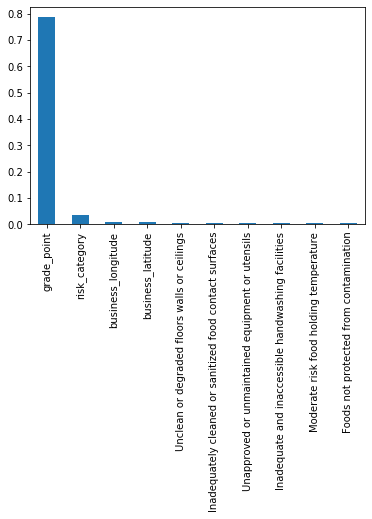

In [42]:
# Feature importance
s = pd.Series(rf.feature_importances_, index=X_train.columns)
s.sort_values(ascending=False)[:10].plot.bar()

In [49]:
# # Let's go to Colab..

# # Grid search
# # Grid search
# from sklearn.model_selection import GridSearchCV
# param_grid = {
#     'n_estimators': [400, 800], 
#     'max_depth': [20, 40, 80],
#     'min_samples_split': [4, 8, 16], 
#     'min_samples_leaf': [1, 2, 4]
# }
# # Create a based model
# rf = RandomForestRegressor(random_state=RS)
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
#                              cv=3, n_jobs=-1, verbose=2)

In [50]:
# grid_search.fit(X_train, y_train)
# grid_search.best_params_

In [51]:
# best_rf = grid_search.best_estimator_
# print('R^2 train: {}, test: {}'.format(best_rf.score(X_train, y_train), best_rf.score(X_test, y_test)))
# # R^2 train: 0.22604356384459667, test: 0.22148444220939167

In [52]:
# # Feature importance
# s = pd.Series(best_rf.feature_importances_, index=X_train.columns)
# s.sort_values(ascending=False)[:10].plot.bar()